 #                                             Emilo Gopaul

##                                                        816007034

###                                                                   Assignment 1

In [374]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [375]:
df = pd.read_csv('survey.csv')

In [376]:
df.shape

(1259, 27)

In [377]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27/08/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27/08/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27/08/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27/08/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27/08/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

We can see that there are 3 columns which are missing some values. This is expected as the "State" colum only applies to persons who are from United States. The "Work interfere" columns is only missing around 1/12th of the values whichisn't that bad. Lastly, the "comments" column may have been optional hence there are too many missing values, we may have to ignore this column.

We see that the "Timestamp" column may not be necessry for this dataset so it can be deleted. Only about 10% of the "Comments" column is filled. This is too small a subset of our dataset to make any conclusions from it, therefore we will also delete this column.

In [379]:
del df["Timestamp"]

In [380]:
del df["comments"]

In [381]:
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [382]:
df["Age"].mean()

79428148.31135821

This does not make sense therefore there must have been some outliers.

In [383]:
df["Age"].describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [384]:
index = df[(df['Age'] >= 100)|(df['Age'] <= 18)].index
df.drop(index, inplace=True)
df['Age'].describe()

count    1244.000000
mean       32.155949
std         7.231587
min        19.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

Here, we have fixed the age column by dropping all the rows where the age does not make sense.

In [385]:
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [386]:
df = df.replace(to_replace= ["male", "M","m"], value = "Male")

In [387]:
df = df.replace(to_replace= ["female", "F","f"], value = "Female")

In [388]:
df["Gender"].describe()

count     1244
unique      39
top       Male
freq       961
Name: Gender, dtype: object

In [389]:
index = df[(df['Gender'] != "Male")&(df['Gender'] != "Female")].index
df.drop(index, inplace=True)
df['Gender'].describe()

count     1196
unique       2
top       Male
freq       961
Name: Gender, dtype: object

In [390]:
df.tail()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1254,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,United States,NC,No,No,No,NaN,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No
1258,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,No,...,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No


In [391]:
df["family_history"].describe()

count     1196
unique       2
top         No
freq       731
Name: family_history, dtype: object

There are 2 unique values in this column and almost all the entries are filled, hence we do not have any cleaning to do.

In [392]:
not_mentally_ill = df["work_interfere"].fillna(0)
#mentally_ill = df["work_interfere"]

In [393]:
df["Mentally_Ill"] = not_mentally_ill
df["Mentally_Ill"] = df["Mentally_Ill"].replace(to_replace= ["Often", "Rarely","Never", "Sometimes"], value = 1)
df.head(20)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Mentally_Ill
0,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,1
1,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,1
2,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,1
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,1
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,1
5,33,Male,United States,TN,NaN,Yes,No,Sometimes,Jun-25,No,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,1
6,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,01-May,Yes,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,1
7,39,Male,Canada,NaN,NaN,No,No,Never,01-May,Yes,...,Don't know,No,No,No,No,No,No,No,No,1
8,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,1
9,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,1


It was observed that only the respondants who answered the question in the "work_interfere" column **HAS** a mental illness, therefore I created a column which takes a note of this in binary form.

In [394]:
df["Mentally_Ill"].value_counts()

1    943
0    253
Name: Mentally_Ill, dtype: int64

In [395]:
is_ill = df[df.Mentally_Ill == 1]
not_ill = df[df.Mentally_Ill == 0]

We slice the dataframe into 2, the subseet of respondants who are and aren't mentally ill.

Text(0.5, 1.0, 'Mentall illness based on Family History')

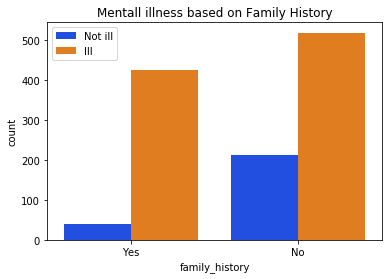

In [396]:
sns.countplot(x='family_history', data=df, hue= "Mentally_Ill", order = ["Yes", "No"], palette = "bright")
plt.legend(["Not ill", "Ill"])
plt.title("Mentall illness based on Family History")

As we can see, approximately 90% of the people with a family history are also mentally ill themselves. With that being said, there is also a significant amount of people that are mentally ill without having a family history of it. Over 50% of the mentally ill patients from our dataset **do not** have a family history of mentall illness. Therefore, we can conclude that while having a family history of mentall illness may increase your chances of getting ill yourself, there is no conclusive evidence which claims that it is hereditary as more than half of the mentally il do not have a family history. However with a larger dataset, we may be able to examine this under more scrutiny.

Text(0.5, 1.0, 'Distribution of Age vs Age of Mentally Ill')

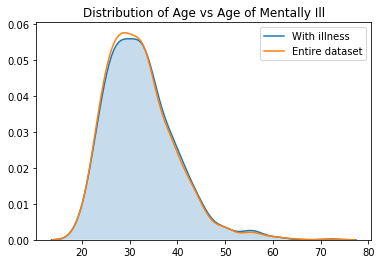

In [397]:
sns.kdeplot(is_ill["Age"], shade = True)
sns.kdeplot(df["Age"], shade = False)
plt.legend(["With illness", "Entire dataset"])
plt.title("Distribution of Age vs Age of Mentally Ill")

I tried to examine if there was a link between mental illness and age. I used a KDE plot to visualize the distribution of age of the entire dataset (Orange line) and overlay it with the distribution of age of the mentally ill (Blue line). However, as we can see, they are both normally distributed and are almost the same, therefore we can conclude that from our dataset, age is definitely not a factor of mental illness.

In [398]:
df["Country"].value_counts()

United States             711
United Kingdom            175
Canada                     68
Germany                    43
Ireland                    27
Netherlands                26
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Sweden                      7
Switzerland                 7
Brazil                      6
Belgium                     6
South Africa                6
Israel                      5
Italy                       5
Singapore                   4
Bulgaria                    4
Austria                     3
Mexico                      3
Greece                      2
Colombia                    2
Portugal                    2
Finland                     2
Russia                      2
Croatia                     2
Denmark                     2
Georgia                     1
Uruguay                     1
Moldova                     1
Norway                      1
Spain     

As we can see, most of our respondants are from the United States, it will be difficult to analyze the other countries as there is too little data about them. We will therefore examine mentall illness by each state in the United States.

Text(0.5, 1.0, 'Countplot of Mentally Ill vs Not Mentally Ill by State')

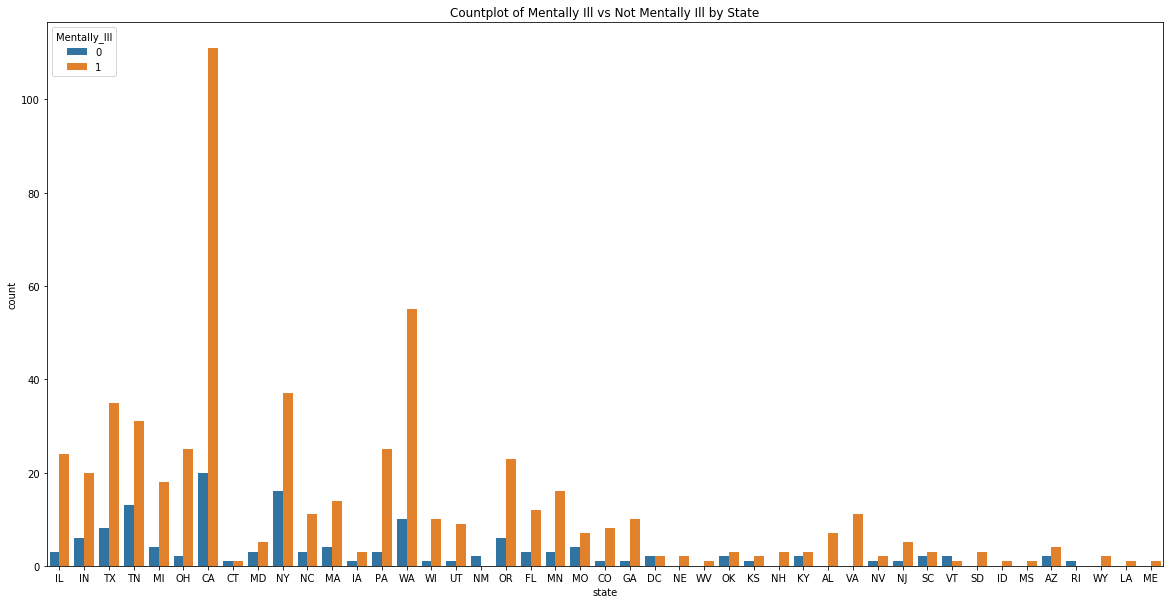

In [399]:
plt.figure(figsize=(20,10))
sns.countplot(x='state', data=df,hue= "Mentally_Ill")
plt.title("Countplot of Mentally Ill vs Not Mentally Ill by State")

A countplot here shows that there is a high number of respondants in "CA", "WA" and "NY". Of these three states, the ratio of mentally ill to non-ill patients are almost 3:1 in "CA" and "WA". It is safe to say that mentall illness is quite prevalent in those two states. For the other states however, there is too little data yet again to make any conclusive deduction however, we must make note of states like "IL", "IN", "TX", "TN", "MI", "OH", "MA" "PA" and even "OR", all of whom had around 20-40 respondants with around 75% of them being mentally ill.

In [400]:
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Mentally_Ill
0,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,1
1,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,1
2,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,1
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,1
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,1


In [401]:
df["self_employed"].describe()

count     1178
unique       2
top         No
freq      1043
Name: self_employed, dtype: object

Text(0.5, 1.0, 'Mental illness based on Self-Employment')

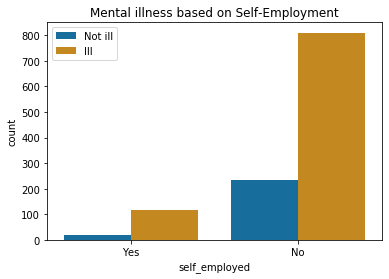

In [402]:
sns.countplot(x='self_employed', data=df, hue= "Mentally_Ill", order = ["Yes", "No"], palette = "colorblind")
plt.legend(["Not ill", "Ill"])
plt.title("Mental illness based on Self-Employment")

Here we can see that most of the employees questioned are not self-employed, of these employees, we notice that 75% of those employees are mentally ill. 

In [403]:
df["remote_work"].describe()

count     1196
unique       2
top         No
freq       843
Name: remote_work, dtype: object

Text(0.5, 1.0, 'Mental illness based on Remote Work')

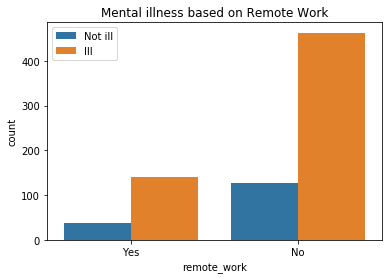

In [411]:
sns.countplot(x='remote_work', data=df, hue= "Mentally_Ill", order = ["Yes", "No"])
plt.legend(["Not ill", "Ill"])
plt.title("Mental illness based on Remote Work")

This plot shows that people who work remotely have a lower risk of getting mental illness as nearly 75% of the people who work in offices suffer from this illness.

In [405]:
df["no_employees"].describe()

count       1196
unique         6
top       Jun-25
freq         275
Name: no_employees, dtype: object

I also noticed that there were a numerous amount of entries with "01-May", so we will also delete those entries as well

In [406]:
index = df[(df['no_employees'] == "Jun-25") | (df['no_employees'] == "01-May")].index
df.drop(index, inplace=True)
df['no_employees'].describe()

count        769
unique         4
top       26-100
freq         273
Name: no_employees, dtype: object

Text(0.5, 1.0, 'Mental illness based on Number of Employees in Firm')

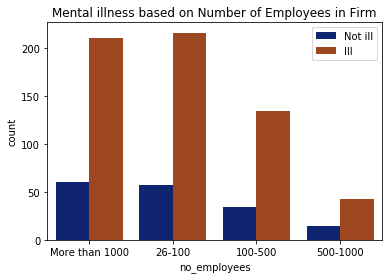

In [407]:
sns.countplot(x='no_employees', data=df, hue= "Mentally_Ill", palette = "dark")
plt.legend(["Not ill", "Ill"])
plt.title("Mental illness based on Number of Employees in Firm")

This plot shows that the two extremes (a small and large number of fellow employees) has a negative effect as they both have a higher percentage of mentally ill cases. Maybe there is too little and too much attention given to employees and there must be a balance.

In [408]:
df["tech_company"].describe()

count     769
unique      2
top       Yes
freq      583
Name: tech_company, dtype: object

Text(0.5, 1.0, 'Mental illness based on Working at a Tech Company')

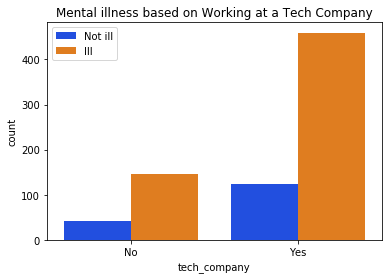

In [482]:
sns.countplot(x='tech_company', data=df, hue= "Mentally_Ill", palette = "bright")
plt.legend(["Not ill", "Ill"])
plt.title("Mental illness based on Working at a Tech Company")

Here, the ratio of mentally ill to not ill is significantly higher when the employees are working in a tech company, howver, there are too few samples to come to this conclusion.

Text(0.5, 1.0, 'Mental illness based on Gender')

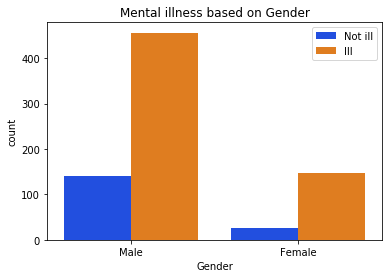

In [410]:
sns.countplot(x='Gender', data=df, hue= "Mentally_Ill", palette = "bright")
plt.legend(["Not ill", "Ill"])
plt.title("Mental illness based on Gender")

There is a sigificantly higher number of male respondants however, there doesn't seem to be a direct link between mental illness and gender.

##### To answer the question, "Are companies taking mental health seriosly?", we will have to extract an answer from analyzing the "Care_Options", "Wellness_Program", "Seek_Help" and "Leave" columns. It is not necessary to plot these results as they are simple to understand without any visual aid.

In [460]:
target = df.loc[:,["care_options", "wellness_program", "seek_help", "leave"]]
target.head()

,care_options,wellness_program,seek_help,leave
1,No,Don't know,Don't know,Don't know
3,Yes,No,No,Somewhat difficult
4,No,Don't know,Don't know,Don't know
8,Yes,No,No,Very difficult
9,No,Don't know,Don't know,Don't know


In [461]:
target["care_options"].describe()

count     769
unique      3
top       Yes
freq      281
Name: care_options, dtype: object

In [462]:
a = target["care_options"].value_counts()
a

Yes         281
No          270
Not sure    218
Name: care_options, dtype: int64

In [450]:
(a[0]/ (a[0] + a[1] + a[2])) * 100

36.54096228868661

We see that only 36% of the respondants knew about the care options their employers provided, if any at all.

In [463]:
b = target["wellness_program"].value_counts()
b

No            446
Yes           184
Don't know    139
Name: wellness_program, dtype: int64

In [454]:
(b[1]/ (b[0] + b[1] + b[2])) * 100

23.927178153446032

Only around 24% of the employees has had their employer ever discuss mental health as part of an employee wellness program.  

In [464]:
c= target["seek_help"].value_counts()
c

No            307
Don't know    267
Yes           195
Name: seek_help, dtype: int64

In [455]:
(c[2]/ (c[0] + c[1] + c[2])) * 100

25.35760728218466

Only 25% of the respondants have had resources provided to them to learn more about mental health issues and how to seek help. 

In [465]:
d = target["leave"].value_counts()
d

Don't know            395
Somewhat easy         156
Very easy             103
Somewhat difficult     69
Very difficult         46
Name: leave, dtype: int64

In [458]:
((d[1] + d[2])/ (d[0] + d[1] + d[2] + d[3] + d[4])) * 100

33.68010403120936

In [459]:
((d[0])/ (d[0] + d[1] + d[2] + d[3] + d[4])) * 100

51.36540962288687

We see that it is easy for only 33% of the respondants to get leave for mental illness and half of the respondants don't even know if they can get leave, this shows that many of the companies are not paying a lot of attention to mental illness or are not making their benefits and services known to their employees. 

###### The four targeted columns have been analyzed and we can clearly see that the answer to the question, 
###### "Are companies taking mental illness seriously?" is definitely a NO.
However, a small percentage of the respondants have responded positively but this is minimal which leads us to draw the above conclusion.

In [466]:
benefit = df.loc[:,["benefits", "mental_health_consequence", "phys_health_consequence", "obs_consequence"]]

In [467]:
a = benefit["benefits"].value_counts()
a

Yes           377
Don't know    266
No            126
Name: benefits, dtype: int64

Approximately half of the respondants do get mental health benefits.

In [469]:
b = benefit["mental_health_consequence"].value_counts()
b

Maybe    304
No       278
Yes      187
Name: mental_health_consequence, dtype: int64

In [470]:
c = benefit["phys_health_consequence"].value_counts()
c

No       571
Maybe    161
Yes       37
Name: phys_health_consequence, dtype: int64

In [473]:
(b[2] / (b[0] +b[1] + b[2])) * 100

24.317295188556567

In [474]:
(c[2] / (c[0] +c[1] + c[2])) * 100

4.811443433029909

While both percentages are fairly low, we deduce that 24% of employees feel that discussing a mental health issue with their employer will have more negative consequences than discussing a physical health problem with them (only 5% feel that it will have a negative consequence). 

In [481]:
is_ill["treatment"].value_counts()

Yes    596
No     347
Name: treatment, dtype: int64

There are approximately 63% of individuals in this dataset who have been treated for their mental illness. 

# _Conclusion_

###### (Note: All findings are based upon the dataset provided. This may not actually be true as the dataset is fairly small to make any bold conclusions.)

We have seen, through a variety of plots that while persons who have a family history of mental illness are very likely to be mentally ill themselves, there is no concrete evidence to say that this is where mental illness stems. We can say this as there was a significantly higher amount of people with mental illness who did not have a family history of it. 

A KDE overlay plot was also used to examine if there was a peak in mental illness at a specific age, however, this was not the case as both distributions were quite similar (almost identical), hence we conlcude that there is no link to age and mental illness.

A countplot was used to analyze the link between mental illness and geographic location. We looked at states in the United States as they filled a larger portion of the dataset. It is difficult to say, but the states "CA", "WA", "NY" and "TX" all had a high proportion of mentally ill respondants. 

While there was a visibly higher amount of male ill respondants, the ratio of male to female was approximately the same, thus no direct link to gender was seen.

It was also noticed that if you worked for an employer (especially at a tech company) in an office with either a large ( more than 1000) or a small (less than 100) amount of employees, then you would have a higher risk of being mentally ill than someone who is not.

It was revealed that the companies do not really prioritize mental health awareness as only a few of the respondants know about care options they are provided with from the company, 75% of the employees has not had their employer discuss the topic as a wellness program. In most cases, the resources for the employees were not provided for them to seek help if needed and lastly, almost 67% of the respondants did not find it easy to take medical leave for their mental health condition.

While around half of the respondants were guaranteed some sort of mental health benefit, many of them were slightly fearful to discuss their condition in the workplace as they felt it might have some negative impact of their work.


It was noticed that 37% of people who know they are mentally ill yet have not sought treatment, while this may be a personal choice, companies can create awareness by normalizing the illness in the workplace, as we can see mental health is a very serious issue and it is quite prevalent in the workplace. If more information is spread about the issue, people may feel more comfortable to open up to their illness. 

While we cannot be certain of where mental health stems, we can say that employers can provide benefits and wellness programs for their employees to seek help. This illness may be hereditary, but the work environment of the individual has an impact as well.